In [272]:
!pip freeze
!pip3 install numpy
!pip3 install pandas
!pip3 install sklearn
!pip3 install matplotlib
!pip3 install pydotplus
!pip3 install six


absl-py==0.10.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
appdirs==1.4.4
argon2-cffi==20.1.0
asgiref==3.3.1
astor==0.8.1
astropy==4.1
astunparse==1.6.3
async-generator==1.10
atari-py==0.2.6
atomicwrites==1.4.0
attrs==20.3.0
audioread==2.1.9
autograd==1.3
Babel==2.9.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==3.2.3
blis==0.4.1
bokeh==2.1.1
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.6
cachetools==4.2.1
catalogue==1.0.0
certifi==2020.12.5
cffi==1.14.4
chainer==7.4.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.2.0
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.5
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.5
Cython==0.29.21
daft==0.0.4
dask==2.12.0
dataclasses==0.8
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.3
distributed==1.25.3
Django==3.1.5
dlib==19.18.0
dm-tree==0.1.5
docopt

In [273]:
# read csv file
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('cleaned_processed.cleveland.data', header = None)
df.head()

Saving cleaned_processed.cleveland.data to cleaned_processed.cleveland (40).data


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


---------------------------
Accuracy for decision tree is 0.883333
---------------------------


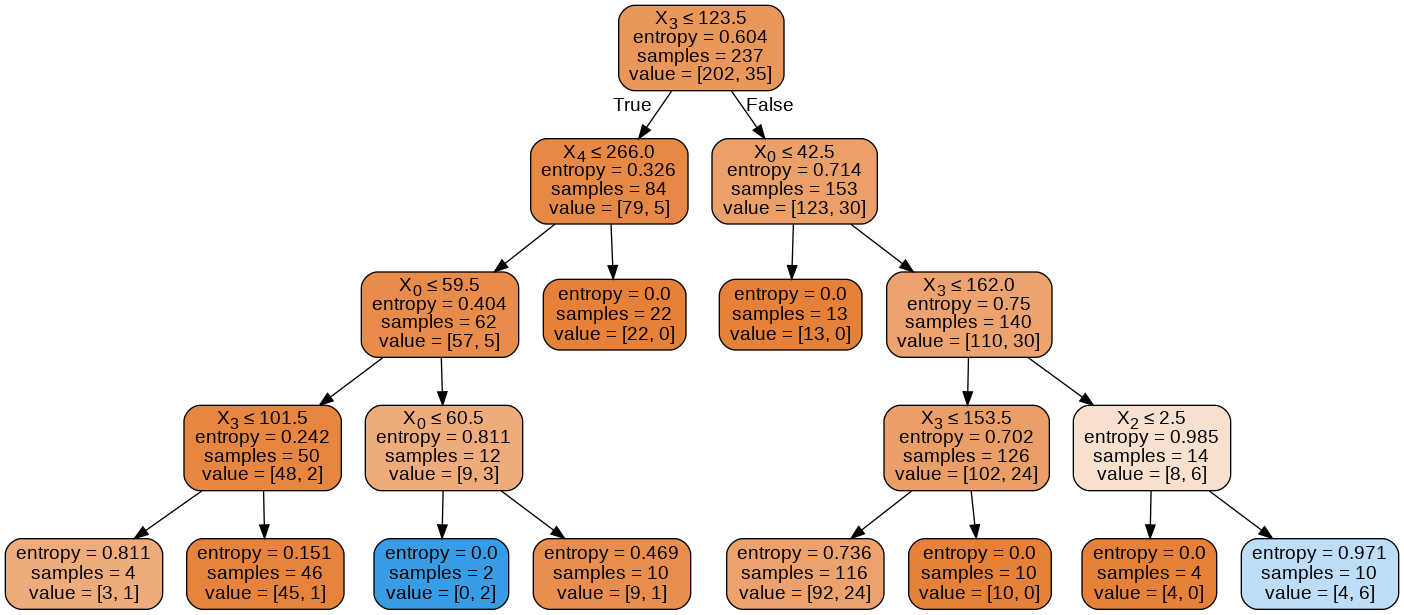

In [274]:

df.drop(df.columns[[6,7,8,9,10,11,12,13]], axis = 1, inplace=True)

x = df.drop(df.columns[[5]],axis=1)
y = df.drop(df.columns[[0,1,2,3,4]],axis=1)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Decision Trees

from sklearn import tree 
decision_tree_entropy = tree.DecisionTreeClassifier(random_state=0, max_depth=4,criterion="entropy")
decision_tree_entropy.fit(x_train,y_train)

y_predict = decision_tree_entropy.predict(x_test)

accuracy = decision_tree_entropy.score(x_test,y_test)

print('---------------------------')
print('Accuracy for decision tree is %.5f' %(accuracy))
print('---------------------------')

from sklearn.tree import export_graphviz 
from sklearn.externals.six import StringIO 
from IPython.display import Image  
# https://pydotplus.readthedocs.io/ for generating generates a GraphViz representation of the decision tree.
import pydotplus 

dot_data = StringIO()
export_graphviz(decision_tree_entropy, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())